In [1]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
log_columns = [
               'fV0cosPA', 
               'fCascCosPa',
               'fDcaV0Daughters', 
               'fDcaV0ToPv'
               ]

custom_ranges = {
    # 'fMassOmega': (1.5, 2.1),
    'fPt': (0, 6),
    'fBachPt': (0, 2.0),
    # 'fV0cosPA': (0.9, 1),
    # 'fMassXi': (1.3, 1.4),
    # 'fCascCosPa': (0.9, 1),
    # 'fDcaV0Daughters': (0.04, 0.1),
    # 'fDcaV0ToPv': (0.01, 0.07),
    # 'fBachPt': (-10, 10),
    # 'fTpcInnerParBach': (-10, 10),
    # 'fMLambda': (-10, 10),
    'fNSigmaTpcBachKa': (-10, 10),
    'fNSigmaTofBachKa': (-10, 10),
    'fOccupancyFt0c': (0, 15000),
    'fOccupancyIts': (0, 1000),
    # 'fCentralityFT0C': (0, 60),
    # 'fCentralityFT0M': (0, 60),
    # 'fCandFlag': (0, 1)
}

custom_bins = {
    'fMassOmega': 100,
    'fPt': 100,
    'fBachPt': 100,
    'fV0cosPA': 100,
    'fMassXi': 100,
    'fCascCosPa': 100,
    'fDcaV0Daughters': 100,
    'fDcaV0ToPv': 100,
    'fBachPt': 100,
    'fTpcInnerParBach': 100,
    'fMLambda': 100,
    'fNSigmaTpcBachKa': 100,
    'fNSigmaTofBachKa': 100,
    'fOccupancyFt0c': 100,
    'fOccupancyIts': 100,
    'fCentralityFT0C': 100,
    'fCentralityFT0M': 100,
    'fCandFlag': 100
}

n_columns = 17
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

# DATA 


In [ ]:
df_data = pd.read_parquet("path/to/.parquet", engine="pyarrow") 
print(f"Number of dataframe entries: {len(df_data)}")

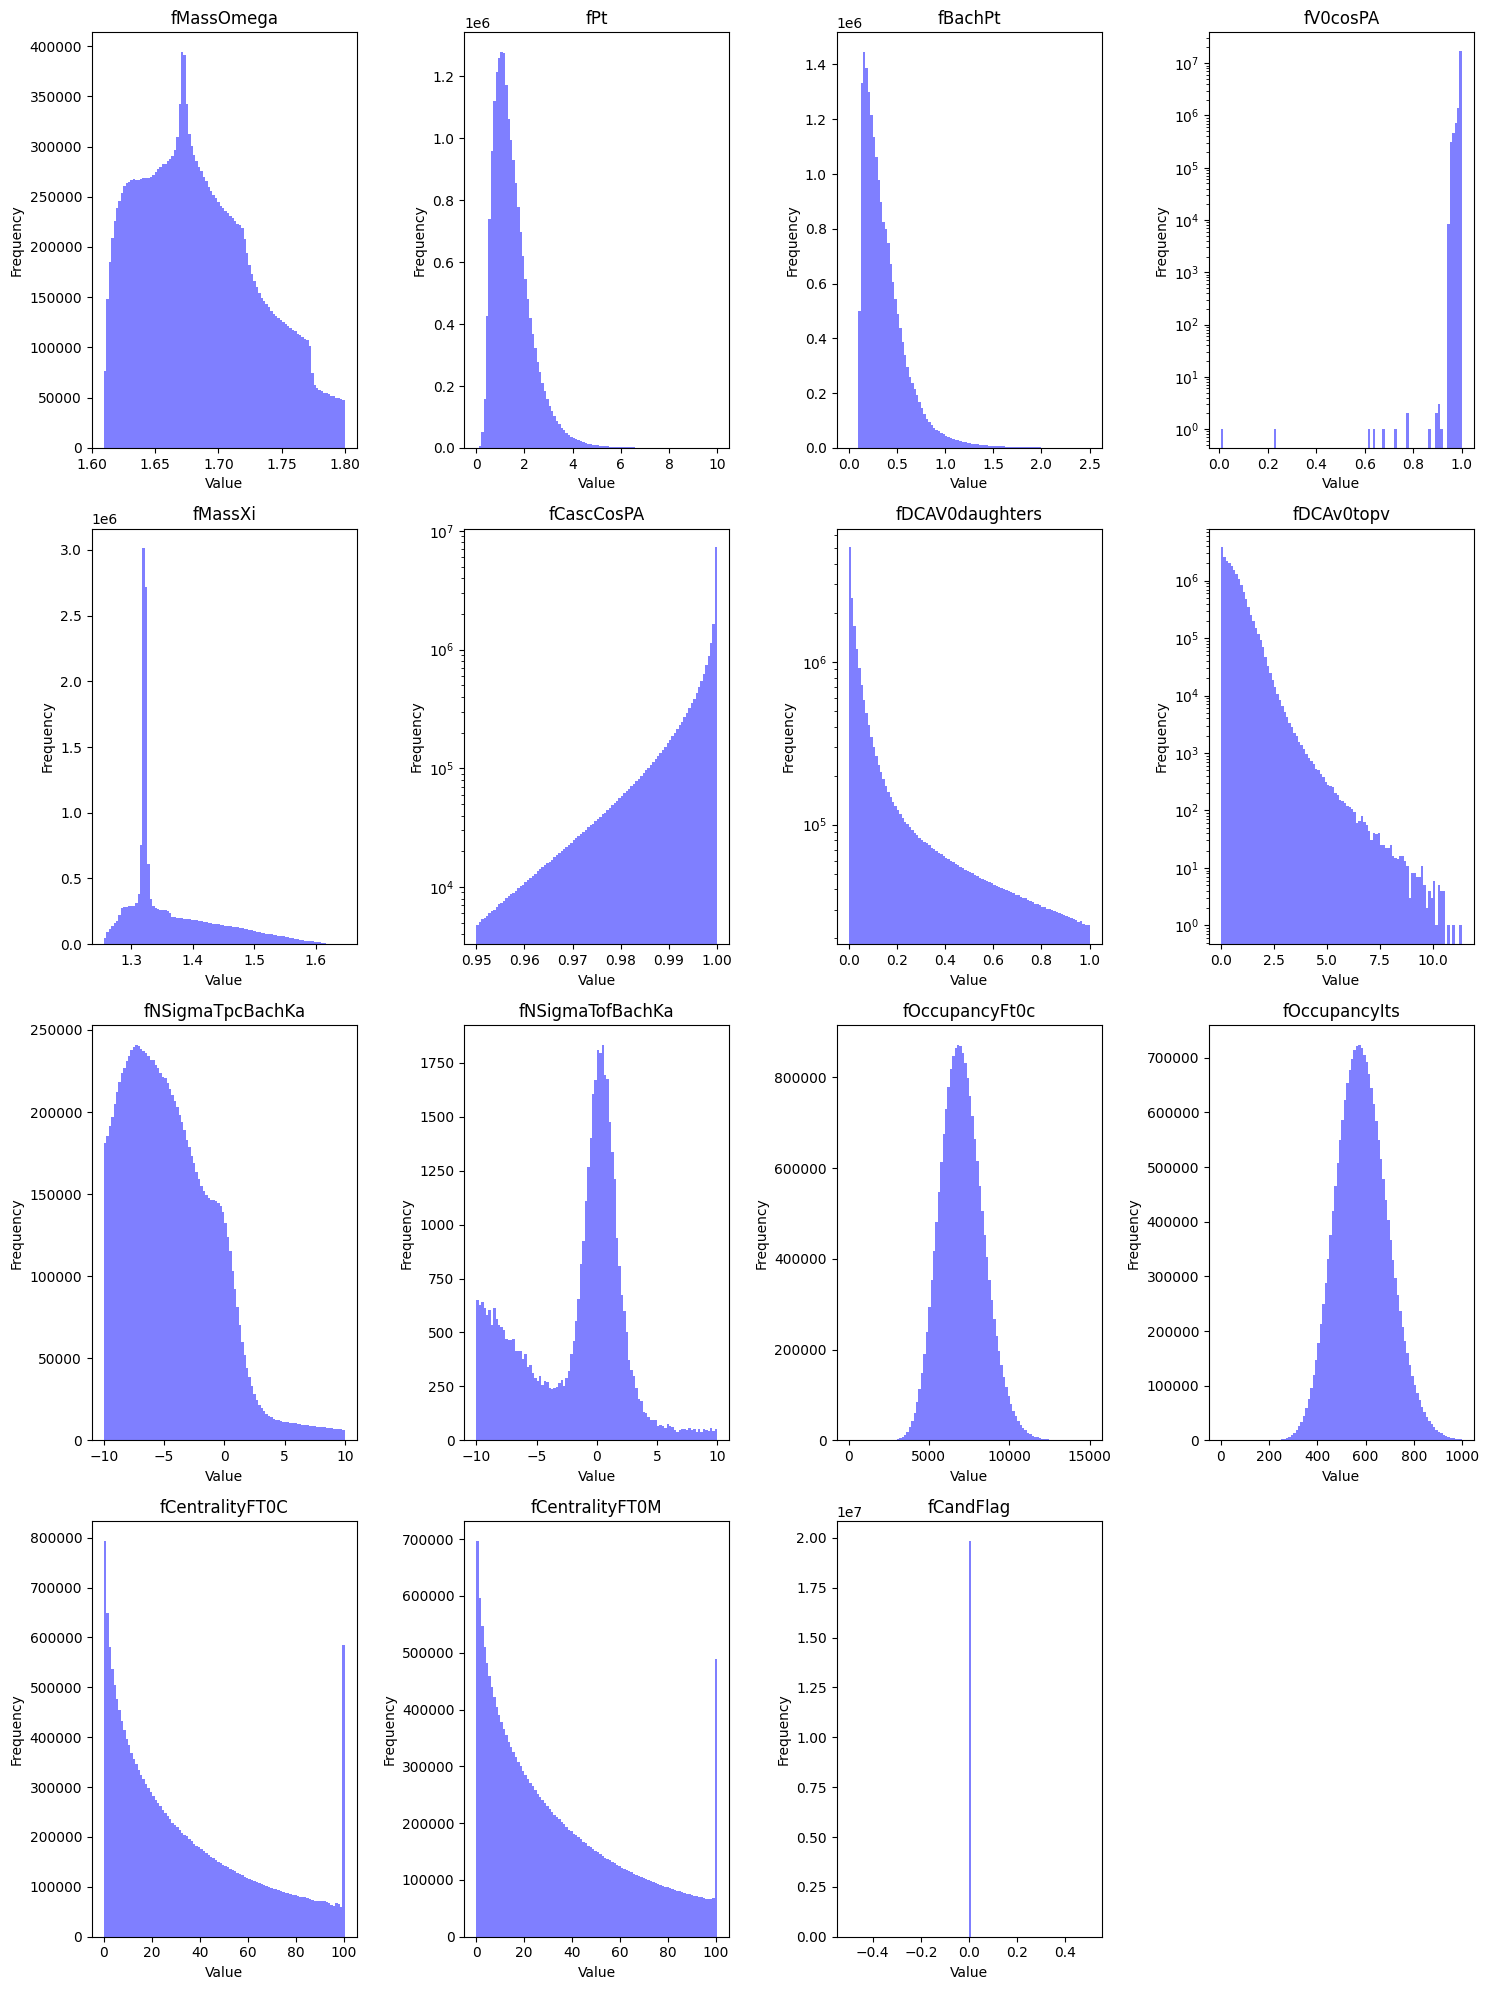

In [55]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [67]:
sel_df_data = df_data.query("(fMassXi < 1.30 or fMassXi > 1.35) and fCascCosPA > 0.9999 and fDCAV0daughters < 0.05 and fDCAv0topv > 0.02 and fDCAv0topv < 1")
print(f"[bef. sel.] Number of dataframe entries: {len(df_data)}")
print(f"[aft. sel.] Number of dataframe entries: {len(sel_df_data)}")
print(f"Dataframe columns: {sel_df_data.columns}")

[bef. sel.] Number of dataframe entries: 19853617
[aft. sel.] Number of dataframe entries: 285215
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


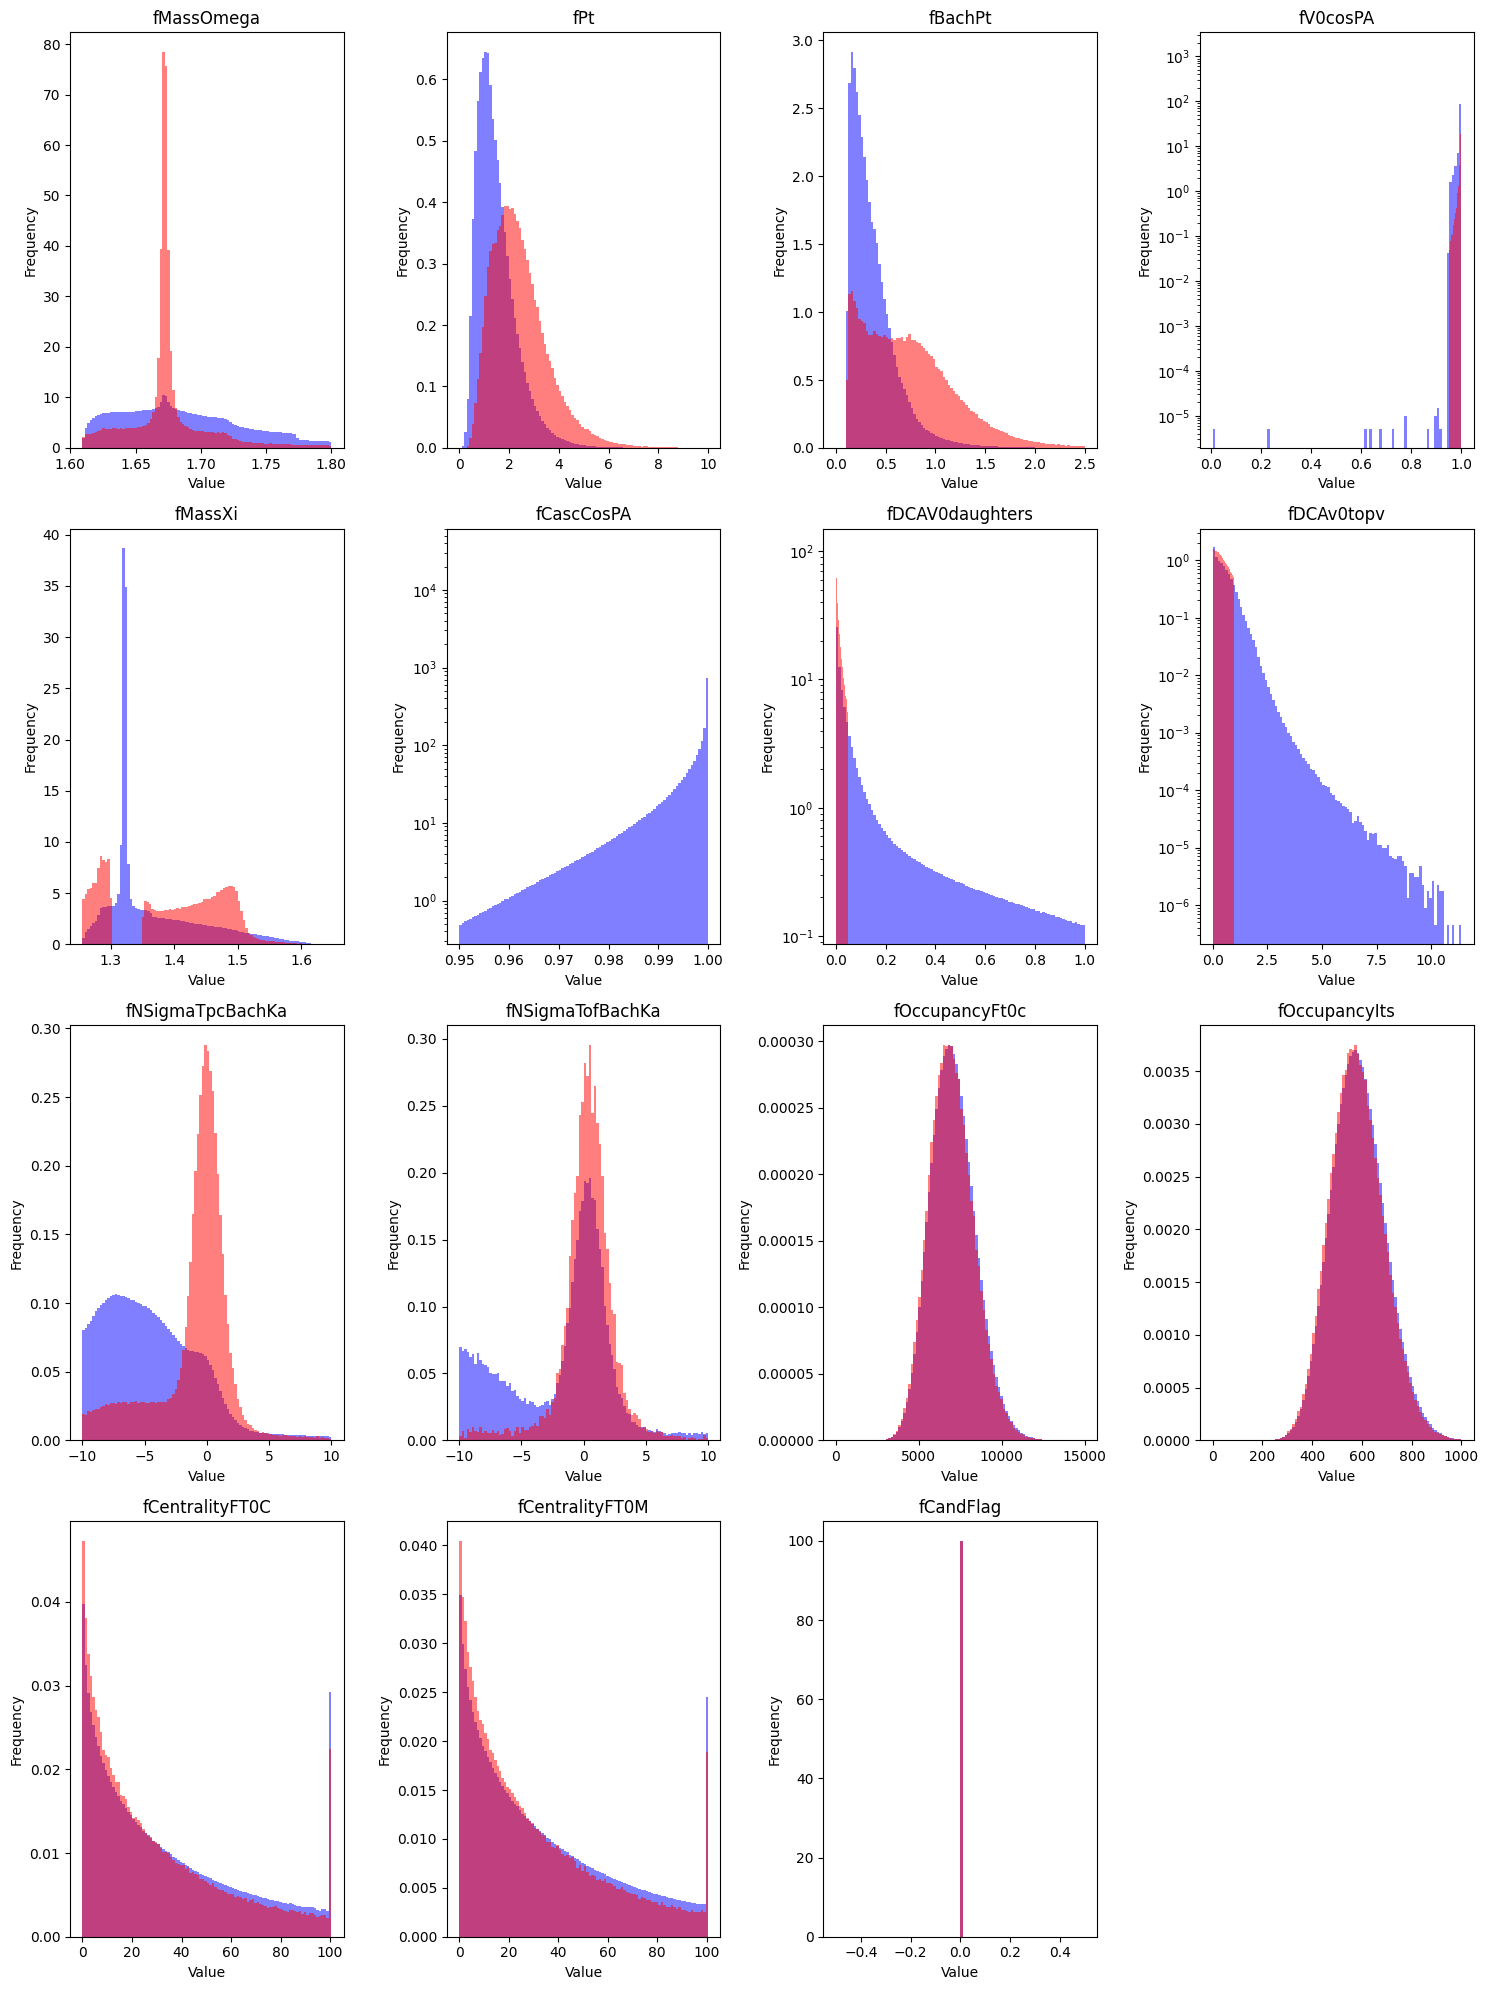

In [68]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
    axes[i].hist(sel_df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# MC

In [ ]:
df_mc = pd.read_parquet("path/to/.parquet", engine="pyarrow")

# Since the Omega is the only cascade which we are checking,
# the casc table is filled only with them and there is no
# need to query on fCandFlag
sel_df_mc = df_mc.query("fCandFlag == 3 or fCandFlag == -3")
print(f"[bef. sel.] Number of dataframe entries: {len(df_mc)}")
print(f"[aft. sel.] Number of dataframe entries: {len(sel_df_mc)}")
print(f"Dataframe columns: {sel_df_mc.columns}")

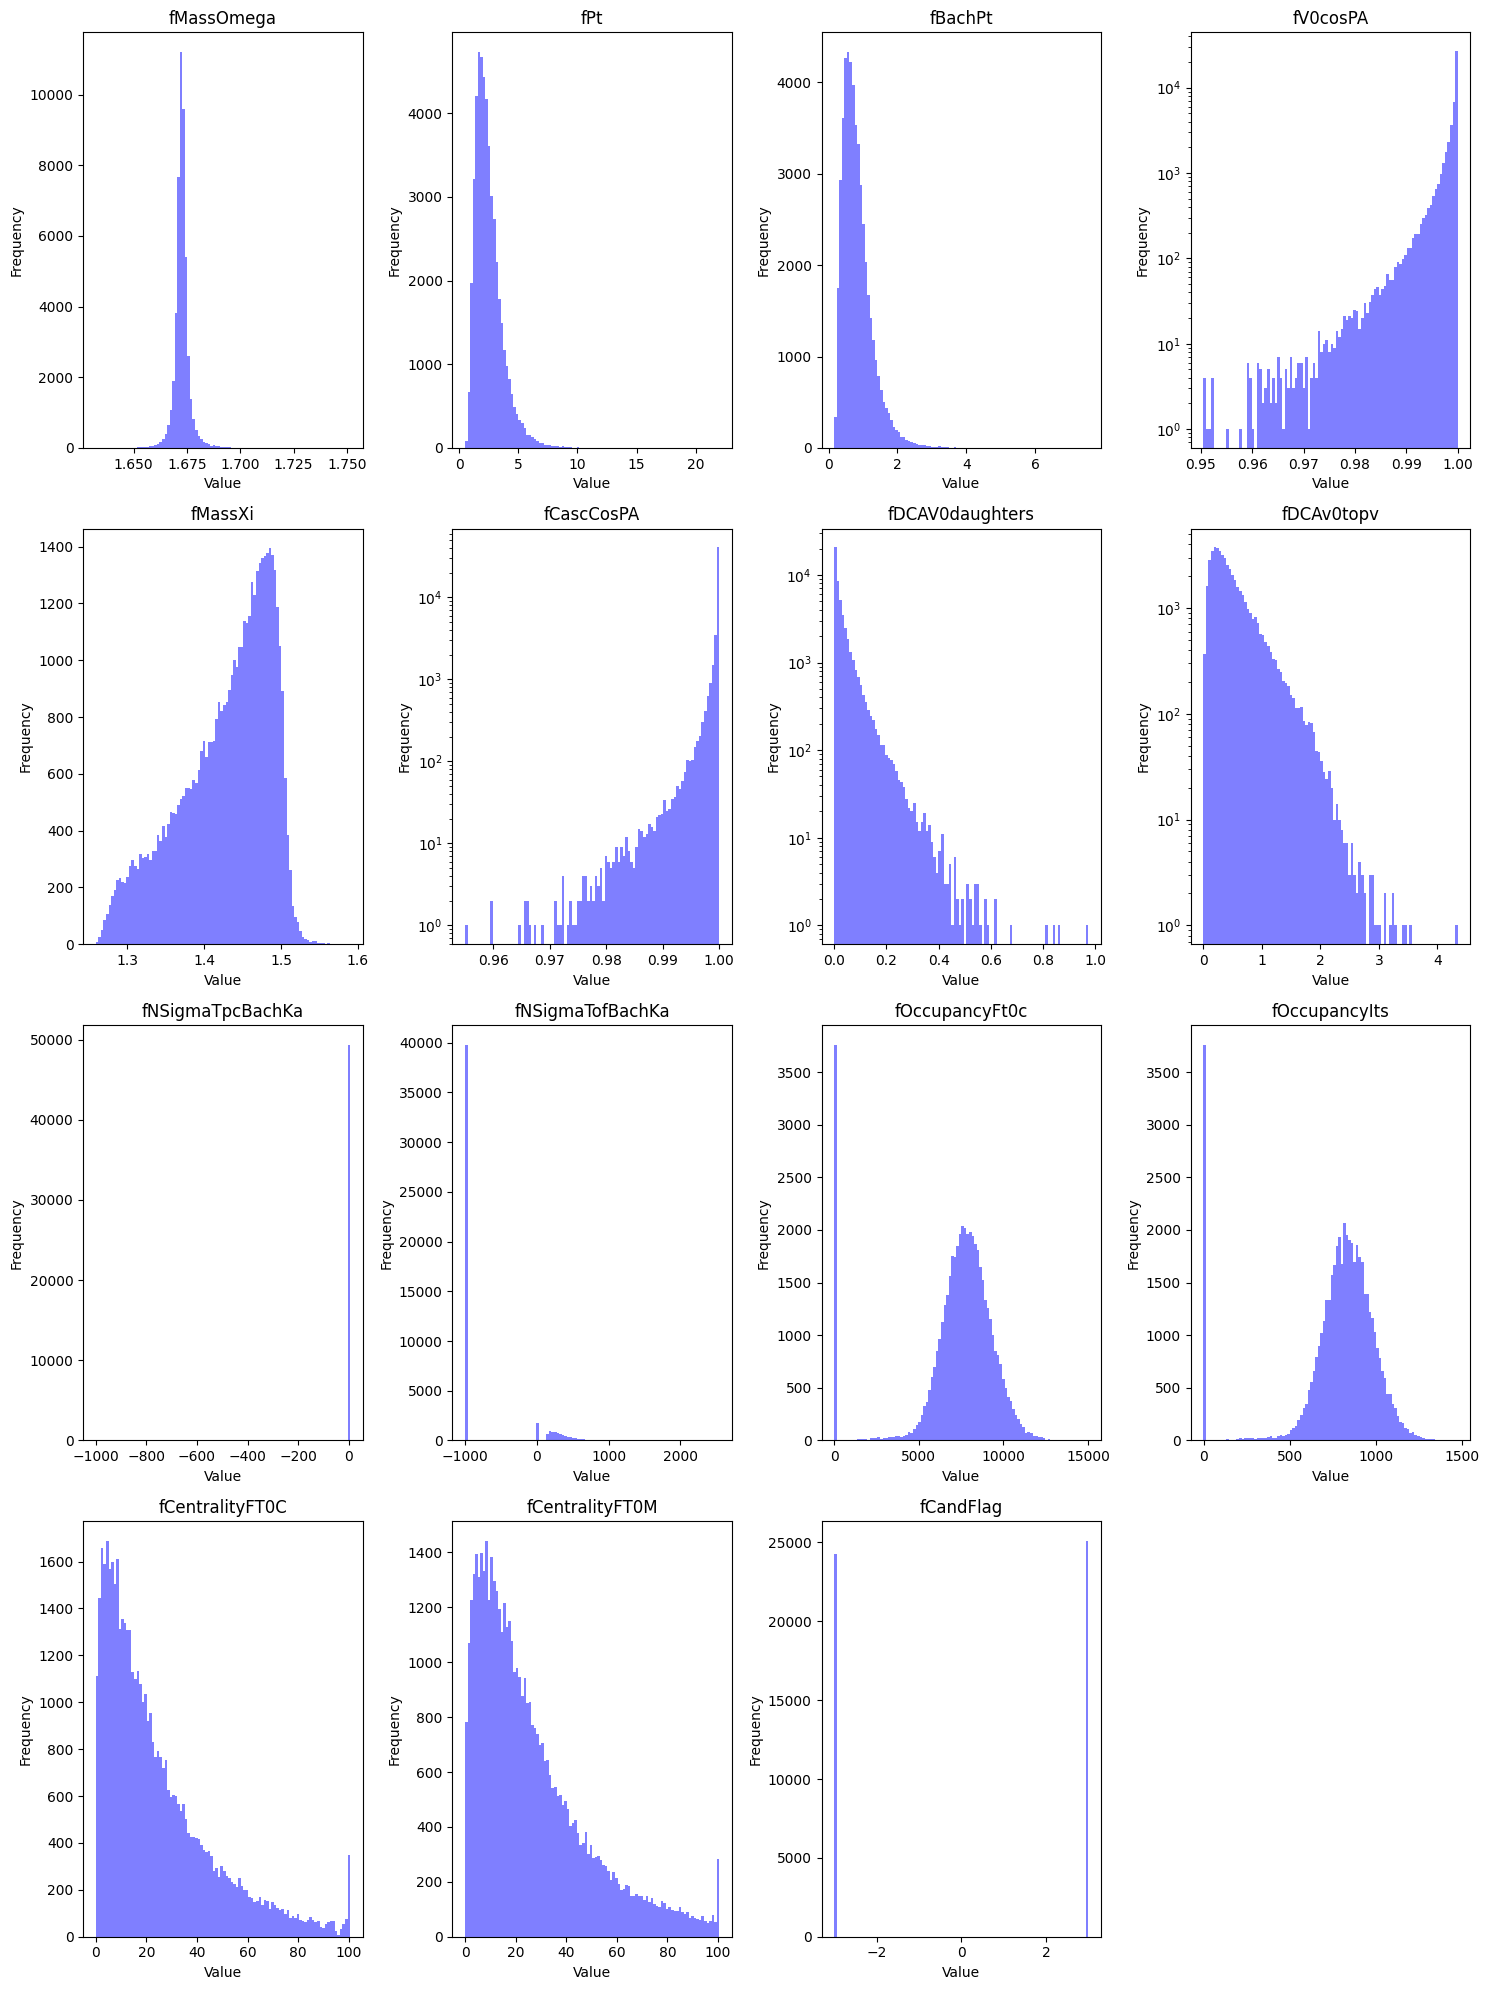

In [43]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_mc.columns):
    axes[i].hist(df_mc[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
    axes[i].hist(sel_df_mc[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()